In [1]:
import numpy as np
import pandas as pd

import jieba
import jieba.analyse

In [2]:
data=pd.read_csv('2019opendog10-12.csv')

In [3]:
data.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容
0,1104,環泥,20191001,5(2019/06),0,M_經營層,MT02_董監異動,改派1董。董事周士貴(宇聲投資代表)卸任。董事楊宗仁(宇聲投資代表)新任。
1,1216,統一,20191001,3(2019/06),0,M_經營層,MT06_高管異動,研發主管陳英昌內部調動，由林宗翰接任。。
2,1342,八貫,20191001,6(2019/06),0,M_經營層,MO01_董監/大股東持股申讓,經理人本人李宏毅於2019/10/01預計申讓1張股票給財團法人證券投資人及期貨交易人保護中...
3,1460,宏遠,20191001,5(2019/06),-1,M_經營層,MT06_高管異動,財務經理俞瀛琁離職，由洪梃華接任。。
4,1595,川寶,20191001,6(2019/06),0,I_產業前景,IF01_增資/減資/融資發債,"川寶科技股份有限公司申報發行員工認股權憑證2,300單位，每單位得認購股數為1,000股，計..."


In [4]:
jieba.set_dictionary("C:/Users/user/jieba-zh_TW-master/jieba/dict.txt")

嘗試切字與文字雲

In [11]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud
myfont = FontProperties(fname=os.path.join('D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf'))

In [12]:
Text = data.iloc[0,7]

In [13]:
seg_list = jieba.cut(Text, cut_all = True)
seg_list = " ".join(seg_list)
print(seg_list)

改派 1 董   董事 周 士 貴   宇 聲 投資 代表   卸任   董事 楊宗仁   宇 聲 投資 代表   新任  


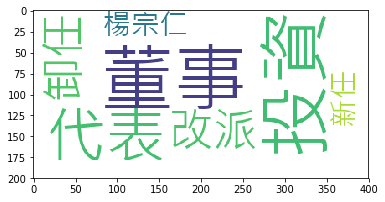

In [14]:
my_wordcloud = WordCloud(background_color='white',font_path='D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf').generate(seg_list)
plt.imshow(my_wordcloud)
plt.axis('on')
plt.show()

總體切字與文字雲

In [15]:
def cut(text):
    tags = jieba.analyse.extract_tags(text)
    tags = " ".join(tags)
    return tags
old=str(" ")
for i in range(0,len(data)): 
    new=cut(data.iloc[i,7])
    old=old+str(new)

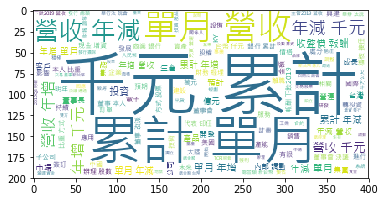

In [16]:
my_wordcloud = WordCloud(background_color='white',font_path='D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf').generate(old)
plt.imshow(my_wordcloud)
plt.axis('on')
plt.show()

In [17]:
cuttext=[]
for i in range(0,len(data)):
    text = data.iloc[i,7]
    tags = jieba.analyse.extract_tags(text)
    cuttext.append(tags)

In [18]:
cuttext

[['宇聲', '投資', '董事', '改派', '周士貴', '楊宗仁', '代表', '卸任', '新任'],
 ['研發', '英昌', '內部', '調動', '林宗翰', '接任', '主管'],
 ['預計',
  '申讓',
  '經理人',
  '宏毅',
  '2019',
  '10',
  '01',
  '財團',
  '證券',
  '投資人',
  '期貨',
  '保護',
  '0%',
  '為洽',
  '特定人',
  '交易',
  '法人',
  '本人',
  '比重',
  '中心'],
 ['財務', '經理', '離職', '由洪', '梃華', '接任'],
 ['發行',
  '單位',
  '申報',
  '300',
  '認購',
  '000',
  '條第',
  '生效日',
  '正日',
  '員工',
  '認股權',
  '憑證',
  '股數',
  '計得',
  '並以',
  '履約',
  '申報書',
  '完備',
  '業於',
  '2019'],
 ['內部', '蔡宗佑', '離職', '世瑜', '稽核', '接任', '主管'],
 ['公噸',
  '價格',
  '廢鋼',
  '收購',
  '鋼筋',
  '調降',
  '產品',
  '型鋼',
  '牌價',
  '降幅',
  '豐興',
  '30',
  '召開',
  '廠盤',
  '會議',
  '決定',
  '300',
  '4.28%',
  '400',
  '2.51%'],
 ['000',
  '設質',
  '票券',
  '董事長',
  '投資',
  '2019',
  '10',
  '01',
  '股給',
  '合作金庫',
  '累計',
  '58',
  '170',
  '大英',
  '本人',
  '金融'],
 ['300',
  '冷軋',
  '公噸',
  '30',
  '不銹鋼',
  '上調',
  '開盤',
  '產品',
  '萬元',
  '系列',
  '唐榮',
  '開出',
  '10',
  '內外銷',
  '盤價',
  '熱軋',
  '內銷',
  '價格',
  '1500',
  '200'],
 ['0

In [19]:
from pandas.core.frame import DataFrame
k=DataFrame(cuttext)
k

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,宇聲,投資,董事,改派,周士貴,楊宗仁,代表,卸任,新任,None,None,None,None,None,None,None,None,None,None,None
1,研發,英昌,內部,調動,林宗翰,接任,主管,None,None,None,None,None,None,None,None,None,None,None,None,None
2,預計,申讓,經理人,宏毅,2019,10,01,財團,證券,投資人,期貨,保護,0%,為洽,特定人,交易,法人,本人,比重,中心
3,財務,經理,離職,由洪,梃華,接任,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,發行,單位,申報,300,認購,000,條第,生效日,正日,員工,認股權,憑證,股數,計得,並以,履約,申報書,完備,業於,2019
5,內部,蔡宗佑,離職,世瑜,稽核,接任,主管,None,None,None,None,None,None,None,None,None,None,None,None,None
6,公噸,價格,廢鋼,收購,鋼筋,調降,產品,型鋼,牌價,降幅,豐興,30,召開,廠盤,會議,決定,300,4.28%,400,2.51%
7,000,設質,票券,董事長,投資,2019,10,01,股給,合作金庫,累計,58,170,大英,本人,金融,None,None,None,None
8,300,冷軋,公噸,30,不銹鋼,上調,開盤,產品,萬元,系列,唐榮,開出,10,內外銷,盤價,熱軋,內銷,價格,1500,200
9,000,設質,董事長,吳雪琴,2019,10,01,股給,板信,商業,銀行,累計,717,配偶,None,None,None,None,None,None


以下還在做